In [30]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


In [31]:
import os
import pandas as pd

# Print current working directory and check paths
print("Current working directory:", os.getcwd())

# Try different possible paths
possible_paths = [
    '../../Datasets/MSFT.csv',
    '../Datasets/MSFT.csv',
    './Datasets/MSFT.csv',
    '../../datasets/MSFT.csv',
    '../datasets/MSFT.csv',
    './datasets/MSFT.csv'
]

# Find the correct path
correct_path = None
for path in possible_paths:
    if os.path.exists(path):
        correct_path = path
        print(f"Found file at: {path}")
        break

if correct_path:
    data = pd.read_csv(correct_path)
    print("\nSuccessfully loaded data:")
    print(data.head())
else:
    print("\nFile not found in any of the checked locations.")
    print("Please verify the file exists and check these locations:")
    for path in possible_paths:
        print(f"- {os.path.abspath(path)}")

Current working directory: c:\Users\timoz\Documents\GitHub\2203235_Capstone\CNN_LSTM\cnn-lstm-improved
Found file at: ../../Datasets/MSFT.csv

Successfully loaded data:
         Date    Open   High    Low  Close    Volume
0  2014-01-02  37.350  37.40  37.10  37.16  30632200
1  2014-01-03  37.200  37.22  36.60  36.91  31134800
2  2014-01-06  36.850  36.89  36.11  36.13  43603700
3  2014-01-07  36.325  36.49  36.21  36.41  35802800
4  2014-01-08  36.000  36.14  35.58  35.76  59971700


In [32]:
data = pd.read_csv('../../Datasets/MSFT.csv') 
data.head()


,Date,Open,High,Low,Close,Volume
0,2014-01-02,37.350,37.40,37.10,37.16,30632200
1,2014-01-03,37.200,37.22,36.60,36.91,31134800
2,2014-01-06,36.850,36.89,36.11,36.13,43603700
3,2014-01-07,36.325,36.49,36.21,36.41,35802800
4,2014-01-08,36.000,36.14,35.58,35.76,59971700


In [33]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date    Open   High    Low  Close    Volume
0  2014-01-02  37.350  37.40  37.10  37.16  30632200
1  2014-01-03  37.200  37.22  36.60  36.91  31134800
2  2014-01-06  36.850  36.89  36.11  36.13  43603700
3  2014-01-07  36.325  36.49  36.21  36.41  35802800
4  2014-01-08  36.000  36.14  35.58  35.76  59971700


In [34]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date     Open    High       Low   Close    Volume  MA for 5 days  \
0     2014-01-02   37.350   37.40   37.1000   37.16  30632200            NaN   
1     2014-01-03   37.200   37.22   36.6000   36.91  31134800            NaN   
2     2014-01-06   36.850   36.89   36.1100   36.13  43603700            NaN   
3     2014-01-07   36.325   36.49   36.2100   36.41  35802800            NaN   
4     2014-01-08   36.000   36.14   35.5800   35.76  59971700         36.474   
...          ...      ...     ...       ...     ...       ...            ...   
2532  2024-01-25  404.320  407.01  402.5294  404.87  21021155        400.302   
2533  2024-01-26  404.370  406.17  402.4300  403.93  17803271        401.354   
2534  2024-01-29  406.060  409.98  404.3300  409.72  24510236        403.996   
2535  2024-01-30  412.260  413.05  406.4501  408.59  33477610        405.934   
2536  2024-01-31  406.960  415.32  397.2100  397.58  47871097        404.938   

      MA for 10 days  MA for 20 days  M

,count,mean,std,min,25%,50%,75%,max
Open,2537.0,1.517836e+02,1.034922e+02,3.473000e+01,5.586000e+01,1.110100e+02,2.447000e+02,4.122600e+02
High,2537.0,1.532916e+02,1.045561e+02,3.588000e+01,5.623000e+01,1.118500e+02,2.470000e+02,4.153200e+02
Low,2537.0,1.502348e+02,1.023992e+02,3.463000e+01,5.543000e+01,1.097900e+02,2.422050e+02,4.064501e+02
Close,2537.0,1.518393e+02,1.035284e+02,3.498000e+01,5.582000e+01,1.111200e+02,2.449900e+02,4.097200e+02
Volume,2537.0,3.003764e+07,1.386097e+07,7.425503e+06,2.155245e+07,2.679912e+07,3.417605e+07,2.025224e+08
MA for 5 days,2533.0,1.517311e+02,1.032817e+02,3.561800e+01,5.563800e+01,1.104460e+02,2.446060e+02,4.059340e+02
MA for 10 days,2528.0,1.515967e+02,1.029836e+02,3.602200e+01,5.546650e+01,1.103885e+02,2.454360e+02,4.015200e+02
MA for 20 days,2518.0,1.513468e+02,1.024337e+02,3.626950e+01,5.535963e+01,1.102765e+02,2.458125e+02,3.903790e+02
MA for 50 days,2488.0,1.506732e+02,1.009695e+02,3.701990e+01,5.520565e+01,1.103775e+02,2.442334e+02,3.804944e+02
EMA for 5 days,2537.0,1.515509e+02,1.032877e+02,3.570278e+01,5.550309e+01,1.099682e+02,2.447591e+02,4.056453e+02


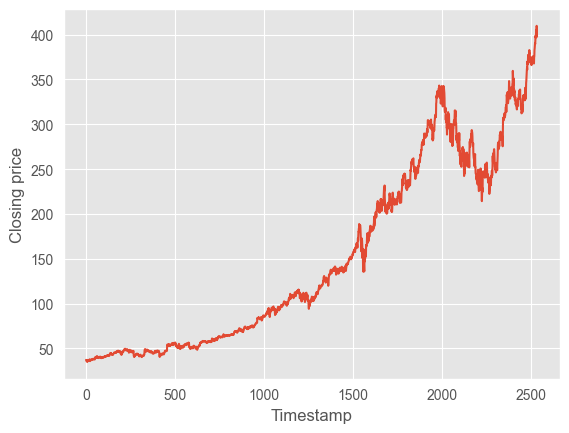

In [35]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [36]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2014-03-14,37.651,38.135,37.5058,37.70,27195600,37.940,38.005,37.8600,37.0199,37.909261,37.921948,37.762257,37.373170,50.127877,0.247351
50,2014-03-17,37.900,38.410,37.7900,38.05,20479600,37.986,38.032,37.8815,37.0377,37.956174,37.945230,37.789661,37.399713,56.204380,0.240944
51,2014-03-18,38.260,39.900,38.2200,39.55,64063900,38.292,38.146,37.9880,37.0905,38.487449,38.237007,37.957312,37.484038,68.772563,0.352837
52,2014-03-19,39.470,39.550,38.9100,39.27,35597200,38.492,38.262,38.0760,37.1533,38.748300,38.424824,38.082330,37.554076,62.983425,0.414146
53,2014-03-20,39.250,40.649,39.2400,40.33,59269800,38.980,38.480,38.2050,37.2317,39.275533,38.771219,38.296394,37.662935,66.721854,0.542018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2016-03-02,52.410,52.960,52.1550,52.95,29289884,51.962,51.901,51.2715,52.5779,52.161885,51.875563,51.776638,52.111062,66.430020,-0.031761
545,2016-03-03,52.970,52.970,51.7800,52.35,24427813,52.012,51.917,51.2810,52.5423,52.224590,51.961825,51.831244,52.120432,62.739464,0.012972
546,2016-03-04,52.400,52.450,51.7100,52.03,33034150,52.158,51.938,51.2825,52.4863,52.159727,51.974220,51.850173,52.116886,57.688442,0.022344
547,2016-03-07,51.560,51.800,50.5800,51.03,38428816,52.188,51.776,51.3260,52.3999,51.783151,51.802544,51.772062,52.074263,49.710425,-0.050340


In [37]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (1976, 15, 7)
Shape of train_X after reshaping: (1976, 1, 15, 7)
Shape of test_X after reshaping: (495, 1, 15, 7)
Number of training samples: 1976
Number of testing samples: 495


In [38]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [39]:
from keras.models import load_model

# load the model
model = load_model('improved_cnn_lstm_model.keras')

In [40]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.711548
R2 Score: 0.711548
Max Error: 0.100535


In [41]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [42]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd; adjust this value to control smoothing amount
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

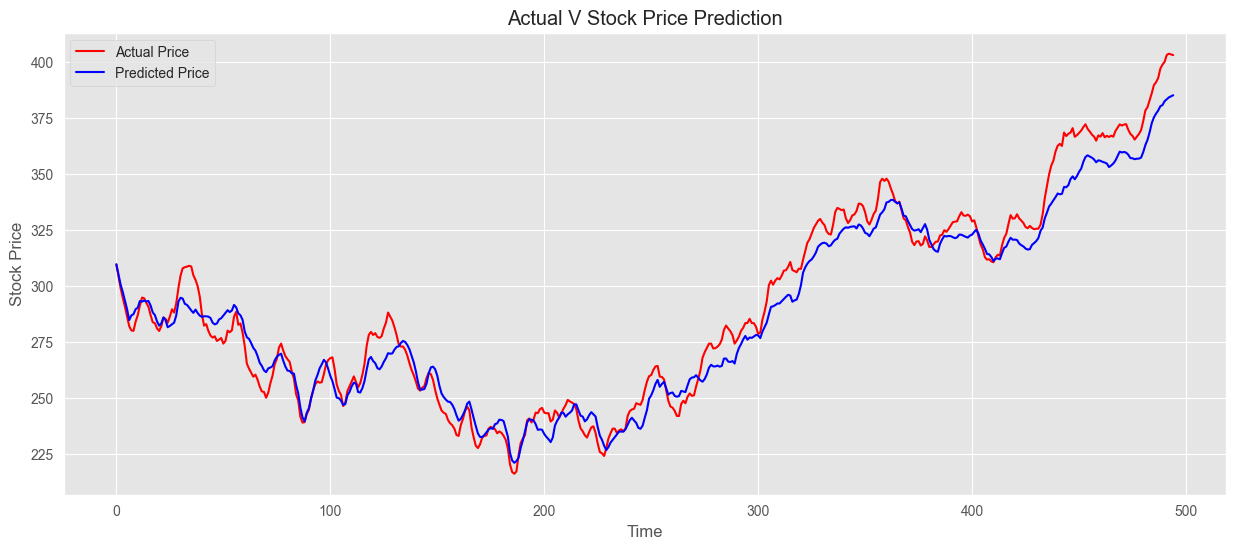

In [43]:
plot_predictions(test_label, predicted, "Actual V Stock Price Prediction")

In [44]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100
r2 = r2_score(test_label, predicted)
# r2 = r2_score(actual_prices, predictions)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R2 Score: {r2:.3f}")


Performance Metrics:
Mean Squared Error (MSE): 108.52573791675236
Root Mean Squared Error (RMSE): 10.417568714280332
Mean Absolute Error (MAE): 8.517038314765554
Mean Absolute Percentage Error (MAPE): 2.89%
R2 Score: 0.947


Text(0, 0.5, 'Closing price')

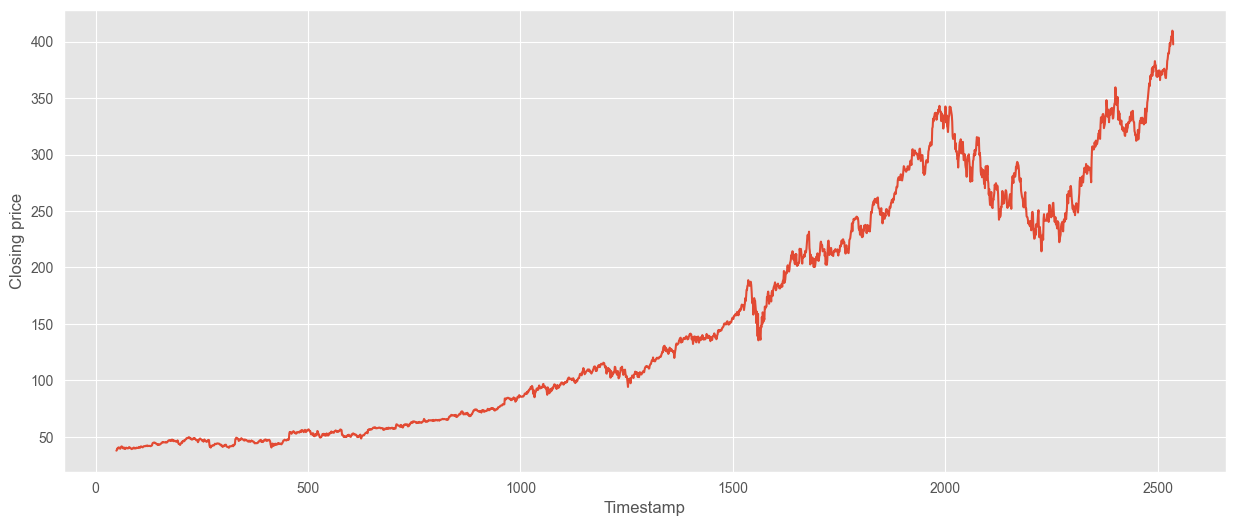

In [45]:
# plot the full dataset

plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")


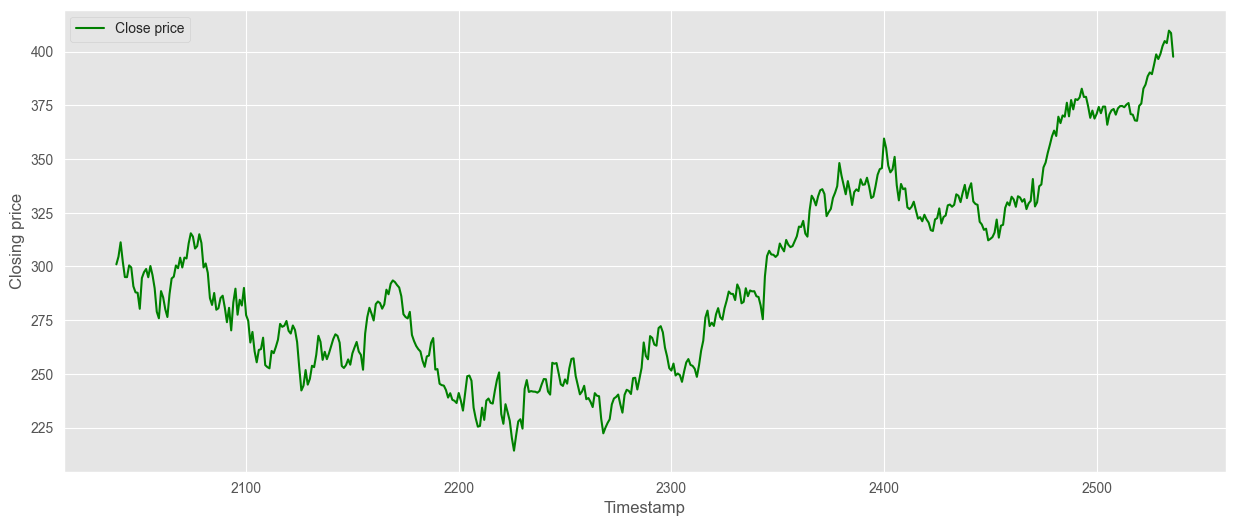

In [46]:
# Plot the last 20% of the data

plt.figure(figsize=(15, 6))
last_20_percent = data['Close'].iloc[int(len(data) * 0.8):]
plt.plot(last_20_percent.index, last_20_percent.values, label="Close price", color='green')
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.legend()

In [47]:
def save_metrics(test_label, predicted, model_name, stock_name):
    """
    Calculate metrics and save to CSV 
    """
    # Calculate metrics
    mse = mean_squared_error(test_label, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_label, predicted)
    mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100
    r2 = r2_score(test_label, predicted)
    
    # Round to 4 decimal places
    rmse = round(rmse, 4)
    mae = round(mae, 4)
    mape = round(mape, 4)
    r2 = round(r2, 4)
    mse = round(mse, 4)
    
    # Create metrics dictionary
    metrics = {
        'Model': [model_name],
        'Stock': [stock_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R2': [r2]
    }
    
    # Convert to DataFrame
    df_metrics = pd.DataFrame(metrics)
    
    # Save to CSV
    filename = f'metrics_{model_name}_{stock_name}.csv'
    df_metrics.to_csv(filename, index=False)
    
    # Print metrics
    print(f"\nMetrics for {model_name} on {stock_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"R² Score: {r2:.4f}")

In [48]:
# Save metrics to CSV
save_metrics(test_label, predicted, "CNN-LSTM-Baseline", "MSFT")  


Metrics for CNN-LSTM-Baseline on MSFT:
Mean Squared Error (MSE): 108.5257
Root Mean Squared Error (RMSE): 10.4176
Mean Absolute Error (MAE): 8.5170
Mean Absolute Percentage Error (MAPE): 2.8903%
R² Score: 0.9473
